## Sensitivity analysis with Basico

**Background:**
Sensitivity analysis helps to understand what is the dynamics result of the system if parameters or variables are varied. COPASI, thus basico package, uses numerical differentiation using finite differences to calculate generalized sensitivities. The mathematical description of sensitivity calculation is dx/dk, for variable x and parameter k. This describes the relation of a change in the variable x to a change in the parameter k.


**Implementation in AIAgents4Pharma:**
Basic functionality would be to calculate the scaled sensitivity table using the basico function `get_scaled_sensitivities()` (based on steady state of the model). Another strategy would be to offer the user to caluclate sensitivity for a specific variable and parameter using the function `get_scaled_sensitivities(run_first=True, settings={'effect': '[X]', 'cause': 'All Parameter Values'})`, where `[X]` is variable or parameter display names.


In [94]:
import basico
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# open a model
#basico.load_biomodel(971)

# load example
basico.load_example('brusselator')


<CDataModel "Root">

`effect`: this specifies the element (or elements that we want to observe)

`cause` and `secondary_cause`: these are the elements to be varied, that we expect to have an effect on the observed element.

---
Valid values for `cause` and `effect` are either a specific element, specified by using either the `display name` or the `CN` of an element. Or an element from the `SENS` constant class

In [61]:
# display settings of the sensitivity analysis
# here all parameter values are going to be varied
# and concentrations of species are going to be observed
basico.get_sensitivity_settings()

{'scheduled': False,
 'update_model': False,
 'method': {'Delta factor': 0.001,
  'Delta minimum': 1e-12,
  'name': 'Sensitivities Method'},
 'report': {'filename': '',
  'report_definition': 'Sensitivities',
  'append': True,
  'confirm_overwrite': False},
 'sub_task': 'Steady State',
 'effect': 'Non-Constant Concentrations of Species',
 'cause': 'All Parameter Values',
 'secondary_cause': 'Not Set'}

In [62]:
# run the analysis
basico.run_sensitivities()

In [63]:
# unscaled (dx/dk) (for variable x and parameter k)
basico.get_unscaled_sensitivities()

# interpretation for "brusselator": changing R2,R3 does not change a steady state concentration of X, but R1 and R4 do in opposite directions.
# Changing R1 and R2 decreases Y in absolute numbers, but changing R3 and R4 increases Y in absolute numbers.


,(R1).k1,(R2).k1,(R3).k1,(R4).k1
[X],5.000e-01,-1.110e-13,-1.110e-13,-4.995e-01
[Y],-5.994e+00,-5.994e+00,6.000e+00,6.000e+00


In [64]:
# scaled sensitivities (dx/x)/(dk/k) by the parameter values: Now the sensitivities are scaled by the actual values of the parameters and steady state concentrations. I.e. *the values is the first table are multiplied by the parameter values and divided by the steady state concentrations.*
basico.get_scaled_sensitivities()

# interpretation: If a 10% change in a parameter gives a 10% change in the output then the sensitivity is 1 regardless of the magnitude of the parameter or of the output.
# If we are comparing different parameters, we should use scaled sensitivities, which are not dependent on the order of magnitude of the parameters.

,(R1).k1,(R2).k1,(R3).k1,(R4).k1
[X],1.000e+00,-2.220e-13,-2.220e-13,-9.990e-01
[Y],-9.990e-01,-9.990e-01,1.000e+00,1.000e+00


In [65]:
# summarized sesitivities
# Euclidian norm  of the colums of table 2, basically a summary of the effect of the parameters.
pd.options.display.float_format = '{:.3e}'.format #use f for float format
basico.get_summarized_sensitivities()

,0
(R1).k1,1.414e+00
(R2).k1,9.990e-01
(R3).k1,1.000e+00
(R4).k1,1.414e+00


In [69]:
# it is possible to use parameter/species names for cause and effect
# alculate sensitivity of initial concneetration of A to transient concnetration of x
basico.get_scaled_sensitivities(run_first=True, settings={'effect': '[X]', 'cause': '[A]_0'})

0.9999999999997411

##  IL6 QSP model

In [ ]:
# calcaulate sensitivity for 537 (IL6) model
basico.load_biomodel(537)


<CDataModel "Root">

In [73]:
# switch of dose parameters
basico.get_parameters()

,type,unit,initial_value,initial_expression,expression,value,rate,key,sbml_id,display_name
name,,,,,,,,,,
kRLOn,fixed,,3.840e-01,,,3.840e-01,0.000e+00,ModelValue_149,kRLOn,Values[kRLOn]
kRLOff,fixed,,1.920e+00,,,1.920e+00,0.000e+00,ModelValue_150,kRLOff,Values[kRLOff]
kgp130On,fixed,,2.052e+01,,,2.052e+01,0.000e+00,ModelValue_151,kgp130On,Values[kgp130On]
kgp130Off,fixed,,1.026e+00,,,1.026e+00,0.000e+00,ModelValue_152,kgp130Off,Values[kgp130Off]
kRAct,fixed,,1.550e+02,,,1.550e+02,0.000e+00,ModelValue_153,kRAct,Values[kRAct]
kRint,fixed,,1.960e+00,,,1.960e+00,0.000e+00,ModelValue_154,kRint,Values[kRint]
kRsynth,fixed,,6.850e-02,,,6.850e-02,0.000e+00,ModelValue_155,kRsynth,Values[kRsynth]
kRintBasal,fixed,,1.561e-01,,,1.561e-01,0.000e+00,ModelValue_156,kRdeg,Values[kRintBasal]
ksynthIL6,fixed,,6.300e-03,,,6.300e-03,0.000e+00,ModelValue_157,kIL6Synth,Values[ksynthIL6]


In [86]:
# set dose to 0
# dose is a global parameter, therefore "set_parameters" is used
# for local parameters "set_reaction_parameters" should be used
basico.set_parameters(name = 'Dose', initial_value = 0)

In [88]:
basico.get_parameters(name = 'Dose')


,type,unit,initial_value,initial_expression,expression,value,rate,key,sbml_id,display_name
name,,,,,,,,,,
Dose,fixed,,0.000e+00,,,0.000e+00,0.000e+00,ModelValue_197,Dose,Values[Dose]
DoseQ2W,fixed,,0.000e+00,,,0.000e+00,0.000e+00,ModelValue_198,parameter_1,Values[DoseQ2W]
Initial for DoseQ2W,fixed,,0.000e+00,Values[DoseQ2W].InitialValue,,0.000e+00,0.000e+00,ModelValue_200,ModelValue_99,Values[Initial for DoseQ2W]
Initial for Dose,fixed,,0.000e+00,Values[Dose].InitialValue,,3.000e+02,0.000e+00,ModelValue_201,ModelValue_98,Values[Initial for Dose]


In [92]:
# simulate the model
res = basico.run_time_course()


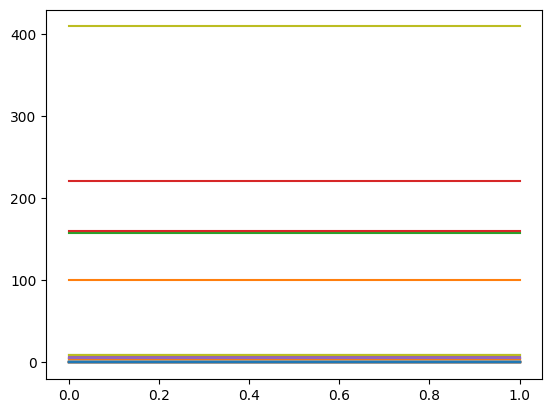

In [98]:
plt.plot(res);


In [101]:
# plot run steady state
basico.run_steadystate()

Error while running the simulation: >WARNING 2025-04-01T14:34:36<
  CSteadyState (2): No steady state was found.


0

In [ ]:
# ad hoc steady state calculations does not work
basico.run_sensitivities()


Could not run Sensitivity Task: >WARNING 2025-04-01T14:32:48<
  CCopasiTask (5): No output file defined for report of task 'Time-Course'.
>WARNING 2025-04-01T14:32:56<
  CCopasiTask (5): No output file defined for report of task 'Time-Course'.
>WARNING 2025-04-01T14:34:29<
  CSteadyState (1): The model is explicitly time dependent. Therefore, the calculation of a steady state using the Newton method is not very meaningful.
>WARNING 2025-04-01T14:34:29<
  CCopasiTask (5): No output file defined for report of task 'Steady-State'.
>WARNING 2025-04-01T14:34:36<
  CSteadyState (1): The model is explicitly time dependent. Therefore, the calculation of a steady state using the Newton method is not very meaningful.
>WARNING 2025-04-01T14:34:36<
  CCopasiTask (5): No output file defined for report of task 'Steady-State'.
>WARNING 2025-04-01T14:36:21<
  CSteadyState (1): The model is explicitly time dependent. Therefore, the calculation of a steady state using the Newton method is not very meani

In [108]:
# change steady state settings to time course simulation
# choose "time course" in the sensitivities task, and in the time course task set the duration that is long enough to reach the steady state, e.g. 1000h

# original settings
basico.get_sensitivity_settings()


{'scheduled': False,
 'update_model': False,
 'method': {'Delta factor': 0.001,
  'Delta minimum': 1e-12,
  'name': 'Sensitivities Method'},
 'report': {'filename': '',
  'report_definition': 'Sensitivities',
  'append': True,
  'confirm_overwrite': True},
 'sub_task': 'Steady State',
 'effect': 'Non-Constant Concentrations of Species',
 'cause': 'All Parameter Values',
 'secondary_cause': 'Not Set'}

In [110]:
# change the settings
basico.set_sensitivity_settings({'sub_task' : 'Time Series'})

In [137]:
#basico.get_valid_methods('Time-Course')

In [121]:
basico.get_task_settings('Time-Course')

{'scheduled': False,
 'update_model': False,
 'problem': {'AutomaticStepSize': False,
  'StepNumber': 100,
  'StepSize': 0.01,
  'Duration': 1.0,
  'TimeSeriesRequested': True,
  'OutputStartTime': 0.0,
  'Output Event': False,
  'Start in Steady State': False,
  'Use Values': False,
  'Values': ''},
 'method': {'Integrate Reduced Model': False,
  'Relative Tolerance': 1e-06,
  'Absolute Tolerance': 1e-12,
  'Max Internal Steps': 100000,
  'Max Internal Step Size': 0.0,
  'name': 'Deterministic (LSODA)'},
 'report': {'filename': '',
  'report_definition': 'Time-Course',
  'append': True,
  'confirm_overwrite': True}}

In [130]:
# set new settings
basico.set_task_settings('Time-Course', settings={'problem':{'Duration':1000, 'StepSize': 1}})
basico.get_task_settings('Time-Course')

{'scheduled': False,
 'update_model': False,
 'problem': {'AutomaticStepSize': False,
  'StepNumber': 1000,
  'StepSize': 1.0,
  'Duration': 1000.0,
  'TimeSeriesRequested': True,
  'OutputStartTime': 0.0,
  'Output Event': False,
  'Start in Steady State': False,
  'Use Values': False,
  'Values': ''},
 'method': {'Integrate Reduced Model': False,
  'Relative Tolerance': 1e-06,
  'Absolute Tolerance': 1e-12,
  'Max Internal Steps': 100000,
  'Max Internal Step Size': 0.0,
  'name': 'Deterministic (LSODA)'},
 'report': {'filename': '',
  'report_definition': 'Time-Course',
  'append': True,
  'confirm_overwrite': True}}

In [131]:
# check if this was set correctly
basico.get_sensitivity_settings()

{'scheduled': False,
 'update_model': False,
 'method': {'Delta factor': 0.001,
  'Delta minimum': 1e-12,
  'name': 'Sensitivities Method'},
 'report': {'filename': '',
  'report_definition': 'Sensitivities',
  'append': True,
  'confirm_overwrite': True},
 'sub_task': 'Time Series',
 'effect': 'Non-Constant Concentrations of Species',
 'cause': 'All Parameter Values',
 'secondary_cause': 'Not Set'}

In [132]:
basico.run_sensitivities()

In [133]:
# result
basico.get_scaled_sensitivities()

,Values[kRLOn].InitialValue,Values[kRLOff].InitialValue,Values[kgp130On].InitialValue,Values[kgp130Off].InitialValue,Values[kRAct].InitialValue,Values[kRint].InitialValue,Values[kRsynth].InitialValue,Values[kRintBasal].InitialValue,Values[ksynthIL6].InitialValue,Values[kdegIL6].InitialValue,...,Values[QSerumGut].InitialValue,Values[QSerumPeriph].InitialValue,Values[kAbSerumToPeriph].InitialValue,Values[kAbPeriphToSerum].InitialValue,Values[kdegAb].InitialValue,Values[Dose].InitialValue,Values[DoseQ2W].InitialValue,Values[Initial for CRP].InitialValue,Values[Initial for DoseQ2W].InitialValue,Values[Initial for Dose].InitialValue
[IL6{serum}],-2.357e-01,1.484e-01,-1.467e-01,8.372e-04,-1.666e-03,1.522e-05,-1.752e-01,1.527e-01,3.828e-01,-9.208e-01,...,-1.120e-12,-1.493e-12,0.000e+00,0.000e+00,-8.711e-13,-0.000e+00,-0.000e+00,0.000e+00,0.000e+00,0.000e+00
[sgp130{serum}],-1.192e-09,4.498e-10,-3.902e-10,5.884e-10,-2.687e-11,5.853e-11,3.093e-10,-1.946e-10,-5.010e-11,3.330e-10,...,2.061e-11,2.038e-11,0.000e+00,0.000e+00,2.061e-11,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
[sR_IL6_sgp130{serum}],5.535e-01,-1.985e-01,2.031e-01,-1.001e+00,-6.743e-03,-8.791e-04,-9.364e-01,8.139e-01,2.952e-02,-7.102e-02,...,2.540e-12,2.382e-12,0.000e+00,0.000e+00,2.223e-12,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
[CRP{serum}],2.124e-02,-7.617e-03,7.579e-03,-3.051e-03,8.289e-04,-8.383e-04,2.087e-03,-2.534e-03,1.245e-03,-2.995e-03,...,-2.636e-11,-2.649e-11,0.000e+00,0.000e+00,-2.649e-11,-0.000e+00,-0.000e+00,0.000e+00,0.000e+00,0.000e+00
[sR{serum}],1.322e-02,-4.900e-03,4.881e-03,-2.813e-03,7.570e-04,-7.773e-04,-5.156e-04,-2.280e-04,8.321e-04,-2.002e-03,...,2.360e-11,2.380e-11,0.000e+00,0.000e+00,2.360e-11,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
[sR_IL6{serum}],5.552e-01,-2.183e-01,-7.687e-01,-1.952e-03,-6.699e-03,-8.782e-04,-9.306e-01,8.088e-01,3.221e-02,-7.748e-02,...,2.814e-11,2.814e-11,0.000e+00,0.000e+00,2.814e-11,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
[Ab{serum}],-9.348e-03,7.098e-03,-3.847e-03,5.359e-03,-2.077e-04,3.031e-03,-2.364e-02,3.200e-02,1.486e-03,4.324e-03,...,3.761e-03,3.802e-03,0.000e+00,0.000e+00,-1.794e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
[Ab_sR{serum}],3.868e-03,2.198e-03,1.033e-03,2.546e-03,5.490e-04,2.253e-03,-2.416e-02,3.177e-02,2.318e-03,2.328e-03,...,3.762e-03,3.802e-03,0.000e+00,0.000e+00,-1.794e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
[Ab_sR_IL6{serum}],8.939e-04,-2.554e-04,-1.658e-03,5.964e-05,-2.050e-03,-3.000e-04,1.287e-03,1.264e-03,-2.832e-04,-1.797e-04,...,1.190e-03,1.189e-03,-0.000e+00,-0.000e+00,-1.797e+00,0.000e+00,0.000e+00,-0.000e+00,-0.000e+00,-0.000e+00
[CRP Suppression (%)],7.613e+11,-2.730e+11,2.716e+11,-1.094e+11,2.971e+10,-3.005e+10,7.482e+10,-9.082e+10,4.462e+10,-1.073e+11,...,-9.447e+02,-9.493e+02,-0.000e+00,-0.000e+00,-9.493e+02,-0.000e+00,-0.000e+00,-3.581e+13,-0.000e+00,-0.000e+00


In [136]:
# get summarized sensitivities
basico.get_summarized_sensitivities().sort_values(by=0, ascending=False)

,0
Values[kdegCRP].InitialValue,3.651e+13
Values[kCRPSecretion].InitialValue,3.636e+13
Values[VmProtSynth].InitialValue,3.636e+13
Values[Initial for CRP].InitialValue,3.581e+13
Values[KmProtSynth].InitialValue,1.890e+13
Values[VmSTATDephos].InitialValue,1.552e+12
Values[kcatSTATPhos].InitialValue,1.551e+12
Values[KmSTATPhos].InitialValue,1.547e+12
Values[kintActiveR].InitialValue,1.545e+12
Values[ksynthIL6Gut].InitialValue,1.506e+12


In [140]:
basico.get_species(name = 'CRP')

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id,transition_time,display_name
name,,,,,,,,,,,,,,,
CRP,serum,reactions,nmol/l,2.211e+02,1.331e+17,,,2.211e+02,1.331e+17,6.244e-13,3.760e+02,Metabolite_113,mw114aa90f_5f5b_4fe8_9406_361c8489b6a1,2.778e+00,CRP{serum}
CRP Suppression (%),serum,assignment,nmol/l,-0.000e+00,-0.000e+00,,( [CRP{serum}] - {Values[Initial for CRP]} ) /...,-0.000e+00,-0.000e+00,NaN,NaN,Metabolite_119,CRP_Suppression___,NaN,CRP Suppression (%)
CRP (% of baseline),serum,assignment,nmol/l,1.000e+02,6.022e+16,,[CRP{serum}] / {Values[Initial for CRP]} * 100,1.000e+02,6.022e+16,NaN,NaN,Metabolite_120,CRP____of_baseline,NaN,CRP (% of baseline)
CRP,liver,assignment,nmol/l,1.583e+02,9.535e+16,,Values[VmProtSynth] * [pSTAT3{liver}] / ( Valu...,1.583e+02,9.535e+16,NaN,NaN,Metabolite_130,mwd5313618_89eb_4c8c_bc82_66f10f966349,NaN,CRP{liver}
CRPExtracellular,liver,reactions,nmol/l,4.098e+02,2.468e+17,,,4.098e+02,2.468e+17,-5.048e-13,-3.040e+02,Metabolite_132,mw36ea78c1_ed71_4def_96d3_857a442d7195,5.176e+00,CRPExtracellular


In [152]:
# calculate sensitivities with respect to CRP concentration
# Which parameter values determine CRP concentration?

# effect = CRP concentration, cause = all parameters
basico.get_scaled_sensitivities(run_first=True, settings={'effect': 'CRP{serum}', 'cause': 'All Parameter Values'}).sort_values(by=0, ascending=False)

,0
Values[kCRPSecretion].InitialValue,1.014e+00
Values[VmProtSynth].InitialValue,1.014e+00
Values[kcatSTATPhos].InitialValue,4.326e-02
Values[ksynthIL6Gut].InitialValue,4.202e-02
Values[kdistSerumToTissue].InitialValue,2.679e-02
Values[kRLOn].InitialValue,2.124e-02
Values[kRShedding].InitialValue,1.974e-02
Values[KmSTATDephos].InitialValue,1.587e-02
Values[kgp130On].InitialValue,7.579e-03
Values[ksynthCRP].InitialValue,5.382e-03
